In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from datetime import datetime
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin

### Data Manipulation

In [2]:
#raw hourly data
raw = pd.read_csv('sampled_hourly_data.csv')

#meter reading data
raw_mrd = pd.read_csv('sampled_meter_reading_records.csv')

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4379 entries, 0 to 4378
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 4379 non-null   object 
 1   Time                                 4379 non-null   int64  
 2   Acc. Corrected Meter Reading (Sm3)   4379 non-null   object 
 3   Acc. Uncorrected Meter Reading (m3)  4379 non-null   object 
 4   Consumption (Sm3)                    4236 non-null   object 
 5   Consumption (m3)                     4236 non-null   float64
 6   Pressure (kPa)                       4379 non-null   float64
 7   Temperature (°C)                     4379 non-null   float64
 8   Conversion Factor                    4236 non-null   float64
 9   Contractual Conversion Factor        4379 non-null   float64
 10  Z Factor                             4379 non-null   int64  
dtypes: float64(5), int64(2), objec

In [4]:
#hourly
#select 'Date', 'Time', 'Acc. Corrected Meter Reading (Sm3)', 'Acc. Uncorrected Meter Reading (m3)', 'Pressure (kPa') cols
raw_select = raw.iloc[:, [0, 1, 2, 3, 4, 5, 6]]

#drop null values
#raw_no_null = raw_select.dropna()

#convert the column 'Date' into datetime
raw_select['Date'] = pd.to_datetime(raw_select['Date'], format = "%d/%m/%Y", errors='coerce')

#convert the columne 'Time' into strings with 2 characters, with leading zeros
raw_select['Time'] = raw_select['Time'].astype(str).str.zfill(2)

#combine 'Date' and 'Time' column to create 'DateTime', formatted as datetime
raw_select['Datetime'] = raw_select['Date'] + pd.to_timedelta(raw_select['Time'] + ':00:00')

#convert the same concat column 'DateTime', with the the proper formatting
raw_select['Datetime'] = pd.to_datetime(raw_select['Datetime'], format = "%d/%m/%Y %H/%M/%S")

#change object format to float
#try using lambda method for this
raw_select[["Consumption (Sm3)", "Consumption (m3)", "Acc. Corrected Meter Reading (Sm3)"]] = raw_select[["Consumption (Sm3)", "Consumption (m3)", "Acc. Corrected Meter Reading (Sm3)"]].replace({',': ''},regex=True).astype(float)

#re-arrange the columns
raw_arr = raw_select.iloc[:,[0, 1, 7, 4, 5, 2, 3, 6]]

raw_arr.to_csv('test.csv')

C:\Users\QS\AppData\Local\Temp/ipykernel_26092/2522331714.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_select['Date'] = pd.to_datetime(raw_select['Date'], format = "%d/%m/%Y", errors='coerce')
C:\Users\QS\AppData\Local\Temp/ipykernel_26092/2522331714.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_select['Time'] = raw_select['Time'].astype(str).str.zfill(2)
C:\Users\QS\AppData\Local\Temp/ipykernel_26092/2522331714.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [5]:
#view raw_arr structure

raw_arr

Date Time            Datetime  Consumption (Sm3)  Consumption (m3)  \
0    2023-09-01   00 2023-09-01 00:00:00          1146.1900          250.1346   
1    2023-09-01   01 2023-09-01 01:00:00          1341.0500          293.6615   
2    2023-09-01   02 2023-09-01 02:00:00          1276.7300          278.7844   
3    2023-09-01   03 2023-09-01 03:00:00           865.3105          187.6714   
4    2023-09-01   04 2023-09-01 04:00:00           886.0261          192.2230   
...         ...  ...                 ...                ...               ...   
4374 2024-03-01   06 2024-03-01 06:00:00           975.5369          212.6045   
4375 2024-03-01   07 2024-03-01 07:00:00          1001.8000          218.2850   
4376 2024-03-01   08 2024-03-01 08:00:00           890.4678          193.4320   
4377 2024-03-01   09 2024-03-01 09:00:00           859.4740          187.0437   
4378 2024-03-01   10 2024-03-01 10:00:00           826.5624          180.2678   

      Acc. Corrected Meter Reading (Sm3) Acc. Uncorrected Meter Reading (m3)  \
0                                1377.07                            5,463.68   
1                                1378.41                            5,463.97   
2                                1379.69                            5,464.25   
3                                1380.56                            5,464.44   
4                                1381.44                            5,464.63   
...                                  ...                                 ...   
4374                             4754.60                            6,159.18   
4375                             4755.60                            6,159.40   
4376                             4756.49                            6,159.59   
4377                             4757.35                            6,159.78   
4378                             4758.18                            6,159.96   

      Pressure (kPa)  
0             475.68  
1             473.53  
2             474.52  
3             478.14  
4             478.27  
...              ...  
4374          474.80  
4375          475.29  
4376          477.09  
4377          476.79  
4378          476.32  

[4379 rows x 8 columns]

In [6]:
#mrd
#convert the Date Columns into datetime
raw_mrd['Previous Reading Date'] = pd.to_datetime(raw_mrd['Previous Reading Date'], format = '%d/%m/%Y %H:%M')
raw_mrd['Current Reading Date'] = pd.to_datetime(raw_mrd['Current Reading Date'], format = '%d/%m/%Y %H:%M')

#change types to int
raw_mrd[["Previous Meter Reading" , "Current Meter Reading", "Row Level Consumption", "Row Level Adjustment", "Total Consumption"]] = raw_mrd[["Previous Meter Reading" , "Current Meter Reading", "Row Level Consumption", "Row Level Adjustment", "Total Consumption"]].replace({',': ''},regex=True).astype(float)

#rounding off to nearest minutes
raw_mrd["Previous Reading Date"] = raw_mrd["Previous Reading Date"].dt.round('min')
raw_mrd["Current Reading Date"] = raw_mrd["Current Reading Date"].dt.round('min')

#arrays for previous reading and current reading dates
prev_date = raw_mrd["Previous Reading Date"]
curr_date = raw_mrd["Current Reading Date"]

#calculate number of days between current and previous reading date
raw_mrd["Number of Days"] = (curr_date - prev_date).dt.days

#to assign billing months in the for loop & if statement
for x in range(len(prev_date)):
    time_prev_diff = ((prev_date[x] + MonthEnd(0)) - prev_date[x])
    time_curr_diff = (curr_date[x] - (curr_date.dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1))[x])

    if prev_date[x].month != curr_date[x].month:
        middle_date = prev_date[x] + pd.DateOffset(days=(curr_date[x] - prev_date[x]).days // 2)
        raw_mrd.at[x, "Billing Month"] = f"{middle_date.month}, {middle_date.year}"
    elif time_curr_diff > pd.Timedelta('3 days'):
        raw_mrd.at[x, "Billing Month"] = f"{curr_date.dt.month.iloc[x]}, {curr_date.dt.year.iloc[x]}"
    elif time_prev_diff > pd.Timedelta('3 days'):
        raw_mrd.at[x, "Billing Month"] = f"{prev_date.dt.month.iloc[x]}, {prev_date.dt.year.iloc[x]}"
    else:
        raw_mrd.at[x, "Billing Month"] = (curr_date + MonthEnd(-1)).dt.strftime('%m, %Y')
        
        #raw_mrd.at[x, "Billing Month"] = (curr_date + MonthEnd(-1)).dt.month.iloc[x].astype(str)+', '+(curr_date + MonthEnd(-1)).dt.year.iloc[x].astype(str)
        
#sort the dataframe by date & Meter Number
raw_mrd = raw_mrd.sort_values(by = ['Previous Reading Date', 'Meter Number'])

In [7]:
#view raw_mrd structure

raw_mrd

Meter Number Main Meter  Previous Meter Reading Previous Reading Date  \
11          Sm3        Yes               1355432.0   2023-08-31 06:00:00   
5            m3         No               5458946.0   2023-08-31 06:00:00   
10          Sm3        Yes               2051265.0   2023-09-30 06:00:00   
4            m3         No               5602141.0   2023-09-30 06:00:00   
9           Sm3        Yes               2710765.0   2023-11-01 06:00:00   
3            m3         No               5736049.0   2023-11-01 06:00:00   
8           Sm3        Yes               3181526.0   2023-12-01 06:00:00   
2            m3         No               5831616.0   2023-12-01 06:00:00   
7           Sm3        Yes               3686498.0   2024-01-01 06:00:00   
1            m3         No               5934066.0   2024-01-01 06:00:00   
6           Sm3        Yes               4304080.0   2024-02-01 06:00:00   
0            m3         No               6062887.0   2024-02-01 06:00:00   

    Current Meter Reading Current Reading Date  Row Level Consumption  \
11              2051265.0  2023-09-30 06:00:00               695833.0   
5               5602141.0  2023-09-30 06:00:00               719209.0   
10              2710765.0  2023-11-01 06:00:00               659500.0   
4               5736049.0  2023-11-01 06:00:00               672565.0   
9               3181526.0  2023-12-01 06:00:00               470761.0   
3               5831616.0  2023-12-01 06:00:00               479994.0   
8               3686498.0  2024-01-01 06:00:00               504972.0   
2               5934066.0  2024-01-01 06:00:00               514564.0   
7               4304080.0  2024-02-01 06:00:00               617582.0   
1               6062887.0  2024-02-01 06:00:00               647015.0   
6               4739532.0  2024-02-29 06:00:00               435452.0   
0               6155881.0  2024-02-29 06:00:00               467070.0   

    Row Level Adjustment  Total Consumption  Number of Days Billing Month  
11                   0.0           695833.0              30       9, 2023  
5                    0.0           719209.0              30       9, 2023  
10                   0.0           659500.0              32      10, 2023  
4                    0.0           672565.0              32      10, 2023  
9                    0.0           470761.0              30      11, 2023  
3                    0.0           479994.0              30      11, 2023  
8                    0.0           504972.0              31      12, 2023  
2                    0.0           514564.0              31      12, 2023  
7                    0.0           617582.0              31       1, 2024  
1                    0.0           647015.0              31       1, 2024  
6                    0.0           435452.0              28       2, 2024  
0                    0.0           467070.0              28       2, 2024

In [8]:
raw_mrd[raw_mrd["Main Meter"] == "Yes"]

Meter Number Main Meter  Previous Meter Reading Previous Reading Date  \
11          Sm3        Yes               1355432.0   2023-08-31 06:00:00   
10          Sm3        Yes               2051265.0   2023-09-30 06:00:00   
9           Sm3        Yes               2710765.0   2023-11-01 06:00:00   
8           Sm3        Yes               3181526.0   2023-12-01 06:00:00   
7           Sm3        Yes               3686498.0   2024-01-01 06:00:00   
6           Sm3        Yes               4304080.0   2024-02-01 06:00:00   

    Current Meter Reading Current Reading Date  Row Level Consumption  \
11              2051265.0  2023-09-30 06:00:00               695833.0   
10              2710765.0  2023-11-01 06:00:00               659500.0   
9               3181526.0  2023-12-01 06:00:00               470761.0   
8               3686498.0  2024-01-01 06:00:00               504972.0   
7               4304080.0  2024-02-01 06:00:00               617582.0   
6               4739532.0  2024-02-29 06:00:00               435452.0   

    Row Level Adjustment  Total Consumption  Number of Days Billing Month  
11                   0.0           695833.0              30       9, 2023  
10                   0.0           659500.0              32      10, 2023  
9                    0.0           470761.0              30      11, 2023  
8                    0.0           504972.0              31      12, 2023  
7                    0.0           617582.0              31       1, 2024  
6                    0.0           435452.0              28       2, 2024

In [9]:
raw_mrd[raw_mrd["Main Meter"] == "No"]

Meter Number Main Meter  Previous Meter Reading Previous Reading Date  \
5           m3         No               5458946.0   2023-08-31 06:00:00   
4           m3         No               5602141.0   2023-09-30 06:00:00   
3           m3         No               5736049.0   2023-11-01 06:00:00   
2           m3         No               5831616.0   2023-12-01 06:00:00   
1           m3         No               5934066.0   2024-01-01 06:00:00   
0           m3         No               6062887.0   2024-02-01 06:00:00   

   Current Meter Reading Current Reading Date  Row Level Consumption  \
5              5602141.0  2023-09-30 06:00:00               719209.0   
4              5736049.0  2023-11-01 06:00:00               672565.0   
3              5831616.0  2023-12-01 06:00:00               479994.0   
2              5934066.0  2024-01-01 06:00:00               514564.0   
1              6062887.0  2024-02-01 06:00:00               647015.0   
0              6155881.0  2024-02-29 06:00:00               467070.0   

   Row Level Adjustment  Total Consumption  Number of Days Billing Month  
5                   0.0           719209.0              30       9, 2023  
4                   0.0           672565.0              32      10, 2023  
3                   0.0           479994.0              30      11, 2023  
2                   0.0           514564.0              31      12, 2023  
1                   0.0           647015.0              31       1, 2024  
0                   0.0           467070.0              28       2, 2024

In [10]:
#validation checking, to test whether the conditional checks are working as intended

for x in range(len(prev_date)):
    time_prev_diff = ((prev_date[x] + MonthEnd(0)) - prev_date[x])
    time_curr_diff = (curr_date[x] - (curr_date.dt.floor('d') + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin(1))[x])

    if prev_date[x].month != curr_date[x].month:
        print(f"Index: {x}, condition 1 triggered")
        
    elif time_curr_diff > pd.Timedelta('3 days'):
        print(f"Index: {x}, condition 2 triggered")
    
    elif time_prev_diff > pd.Timedelta('3 days'):
        print(f"Index: {x}, condition 3 triggered")
    
    else:
        print(f"Index: {x}, condition 4 triggered")


Index: 0, condition 2 triggered
Index: 1, condition 1 triggered
Index: 2, condition 1 triggered
Index: 3, condition 1 triggered
Index: 4, condition 1 triggered
Index: 5, condition 1 triggered
Index: 6, condition 2 triggered
Index: 7, condition 1 triggered
Index: 8, condition 1 triggered
Index: 9, condition 1 triggered
Index: 10, condition 1 triggered
Index: 11, condition 1 triggered


In [11]:
raw_arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4379 entries, 0 to 4378
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 4379 non-null   datetime64[ns]
 1   Time                                 4379 non-null   object        
 2   Datetime                             4379 non-null   datetime64[ns]
 3   Consumption (Sm3)                    4236 non-null   float64       
 4   Consumption (m3)                     4236 non-null   float64       
 5   Acc. Corrected Meter Reading (Sm3)   4379 non-null   float64       
 6   Acc. Uncorrected Meter Reading (m3)  4379 non-null   object        
 7   Pressure (kPa)                       4379 non-null   float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 273.8+ KB


In [12]:
raw_mrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 11 to 0
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Meter Number            12 non-null     object        
 1   Main Meter              12 non-null     object        
 2   Previous Meter Reading  12 non-null     float64       
 3   Previous Reading Date   12 non-null     datetime64[ns]
 4   Current Meter Reading   12 non-null     float64       
 5   Current Reading Date    12 non-null     datetime64[ns]
 6   Row Level Consumption   12 non-null     float64       
 7   Row Level Adjustment    12 non-null     float64       
 8   Total Consumption       12 non-null     float64       
 9   Number of Days          12 non-null     int64         
 10  Billing Month           12 non-null     object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(3)
memory usage: 1.1+ KB


In [13]:
#join tables
time_series = raw_arr.merge(raw_mrd, how = 'left', left_on = 'Datetime', right_on = 'Current Reading Date')

#backfill the Billing Month column to match the billing month labels in the time series data
time_series["Billing Month"] = time_series['Billing Month'].fillna(method = 'bfill')

#maintain time decomposition/ series related columns and discard the rest
time_series = time_series.iloc[:, [0, 1, 2, 3, 4, 7, 18]]

#drop duplicates
time_series = time_series.drop_duplicates(subset = ["Datetime"], keep = "first")

#parsing or split date columns into year, month and day
time_series['Year'] = time_series['Datetime'].dt.year
time_series['Month'] = time_series['Datetime'].dt.month
time_series['Day'] = time_series['Datetime'].dt.day

#decompose the date columns into day of the week, week of the year
time_series['DayOfTheWeek'] = time_series['Datetime'].dt.dayofweek
time_series['WeekOfTheYear'] = time_series['Datetime'].dt.weekofyear

time_series.to_csv('test2.csv')

C:\Users\QS\AppData\Local\Temp/ipykernel_26092/349516686.py:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  time_series['WeekOfTheYear'] = time_series['Datetime'].dt.weekofyear


In [14]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4379 entries, 0 to 4384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               4379 non-null   datetime64[ns]
 1   Time               4379 non-null   object        
 2   Datetime           4379 non-null   datetime64[ns]
 3   Consumption (Sm3)  4236 non-null   float64       
 4   Consumption (m3)   4236 non-null   float64       
 5   Pressure (kPa)     4379 non-null   float64       
 6   Billing Month      4351 non-null   object        
 7   Year               4379 non-null   int64         
 8   Month              4379 non-null   int64         
 9   Day                4379 non-null   int64         
 10  DayOfTheWeek       4379 non-null   int64         
 11  WeekOfTheYear      4379 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(5), object(2)
memory usage: 444.7+ KB


In [15]:
# drop missing Billing Month rows - must be separated from the block above
# this is to only minimzie the sporadic randomness in the data, typically for null values, that may skew the distribution of data
# not applicable trends analysis over time
# use this to conduct t-test
time_series_no_null = time_series.dropna()

In [16]:
# no of hours containing missing consumption

time_series["Consumption (Sm3)"].isnull().sum()

143

In [17]:
# replace the NaN values with 0 in the entire data frame

time_series.fillna(0, inplace = True)

### EDA

#### Imputation

##### Using lower Q1/ Upper Q4 to detect outliers

In [18]:
# Outliers detection using Q1 or Q4 quariles of distrubution of the data

Q1 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.25)
Q1 = Q1[["Datetime" ,"Consumption (Sm3)"]]
Q1 = Q1.rename(columns = {"Datetime": "Datetime", "Consumption (Sm3)": "25% percentile Sm3"})

Q2 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.75)
Q2 = Q2[["Datetime" ,"Consumption (Sm3)"]]
Q2 = Q2.rename(columns = {"Datetime": "Datetime", "Consumption (Sm3)": "75% percentile Sm3"})

#join tables to create cutoff or threshold values to deprecate outliers
Q_cutoff_1 = Q1.merge(Q2, how = 'left', left_on = 'Billing Month', right_on = 'Billing Month')

#maintain related columns and discard the rest
Q_cutoff_1 = Q_cutoff_1.iloc[:, [1, 3]]

Q_cutoff_1

C:\Users\QS\AppData\Local\Temp/ipykernel_26092/303890672.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  Q1 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.25)
C:\Users\QS\AppData\Local\Temp/ipykernel_26092/303890672.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  Q2 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.75)


25% percentile Sm3  75% percentile Sm3
Billing Month                                        
9, 2023                867.357175         1179.192500
10, 2023               519.892200         1132.460000
11, 2023               484.051500          881.917000
12, 2023               473.653250          900.083675
1, 2024                723.487250          923.417450
2, 2024                647.690500          857.091450

In [19]:
# Winsorization - addressing outliers by replacing them with 25% percentile or 75% percentile

# Create a copy
modified_time_series_1 = time_series_no_null.copy()

# Merge the table with Q_cutoff_1
merged_time_series_1 = pd.merge(modified_time_series_1, Q_cutoff_1, left_on='Billing Month', right_index=True)

# Iterate through rows of merged_time_series
for _, row in merged_time_series_1.iterrows():
    
    # Conditional checks go here; comparing current row values with the cutoff row values
    if row['Consumption (Sm3)'] >= row['75% percentile Sm3']:
        merged_time_series_1.at[_, 'Consumption (Sm3)'] = row['75% percentile Sm3']
        
    elif row['Consumption (Sm3)'] <= row['25% percentile Sm3']:
        merged_time_series_1.at[_, 'Consumption (Sm3)'] = row['25% percentile Sm3']
        
    elif row['25% percentile Sm3'] <= row['Consumption (Sm3)'] <= row['75% percentile Sm3']:
        pass

# Display the modified merged_time_series
print(merged_time_series_1)

merged_time_series_1.to_csv('test3.csv')


           Date Time            Datetime  Consumption (Sm3)  Consumption (m3)  \
0    2023-09-01   00 2023-09-01 00:00:00        1146.190000          250.1346   
1    2023-09-01   01 2023-09-01 01:00:00        1179.192500          293.6615   
2    2023-09-01   02 2023-09-01 02:00:00        1179.192500          278.7844   
3    2023-09-01   03 2023-09-01 03:00:00         867.357175          187.6714   
4    2023-09-01   04 2023-09-01 04:00:00         886.026100          192.2230   
...         ...  ...                 ...                ...               ...   
4351 2024-02-29   02 2024-02-29 02:00:00         857.091450          199.4067   
4352 2024-02-29   03 2024-02-29 03:00:00         857.091450          202.1997   
4353 2024-02-29   04 2024-02-29 04:00:00         857.091450          224.7443   
4354 2024-02-29   05 2024-02-29 05:00:00         857.091450          238.5959   
4355 2024-02-29   06 2024-02-29 06:00:00         857.091450          216.2641   

      Pressure (kPa) Billin

##### Using 5% or 95% percentiles to detect outliers

In [20]:
# Outliers detection using 5% or 95% percentiles of distrubution of the data

P5 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.05)
P5 = P5[["Datetime" ,"Consumption (Sm3)"]]
P5 = P5.rename(columns = {"Datetime": "Datetime", "Consumption (Sm3)": "5% percentile Sm3"})

P95 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.95)
P95 = P95[["Datetime" ,"Consumption (Sm3)"]]
P95 = P95.rename(columns = {"Datetime": "Datetime", "Consumption (Sm3)": "95% percentile Sm3"})

#join tables to create cutoff or threshold values to deprecate outliers
Q_cutoff_2 = P5.merge(P95, how = 'left', left_on = 'Billing Month', right_on = 'Billing Month')

#maintain related columns and discard the rest
Q_cutoff_2 = Q_cutoff_2.iloc[:, [1, 3]]

Q_cutoff_2

C:\Users\QS\AppData\Local\Temp/ipykernel_26092/3757220852.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  P5 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.05)
C:\Users\QS\AppData\Local\Temp/ipykernel_26092/3757220852.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  P95 = time_series_no_null.groupby(['Billing Month'], sort = False).quantile(0.95)


5% percentile Sm3  95% percentile Sm3
Billing Month                                       
9, 2023               531.592260           1327.0535
10, 2023              390.575090           1313.0080
11, 2023              396.256820           1232.9360
12, 2023              372.882095           1137.9770
1, 2024               590.295770           1115.6450
2, 2024               414.077920           1017.4690

In [21]:
# Winsorization - addressing outliers by replacing them with 5% percentile or 95% percentile

# Create a copy
modified_time_series_2 = time_series_no_null.copy()

# Merge the table with Q_cutoff_2
merged_time_series_2 = pd.merge(modified_time_series_2, Q_cutoff_2, left_on='Billing Month', right_index=True)

# Iterate through rows of merged_time_series
for _, row in merged_time_series_2.iterrows():
    
    # Conditional checks go here; comparing current row values with the cutoff row values
    if row['Consumption (Sm3)'] >= row['95% percentile Sm3']:
        merged_time_series_2.at[_, 'Consumption (Sm3)'] = row['95% percentile Sm3']
        
    elif row['Consumption (Sm3)'] <= row['5% percentile Sm3']:
        merged_time_series_2.at[_, 'Consumption (Sm3)'] = row['5% percentile Sm3']
        
    elif row['5% percentile Sm3'] <= row['Consumption (Sm3)'] <= row['95% percentile Sm3']:
        pass

# Display the modified merged_time_series
print(merged_time_series_2)

merged_time_series_2.to_csv('test4.csv')


           Date Time            Datetime  Consumption (Sm3)  Consumption (m3)  \
0    2023-09-01   00 2023-09-01 00:00:00          1146.1900          250.1346   
1    2023-09-01   01 2023-09-01 01:00:00          1327.0535          293.6615   
2    2023-09-01   02 2023-09-01 02:00:00          1276.7300          278.7844   
3    2023-09-01   03 2023-09-01 03:00:00           865.3105          187.6714   
4    2023-09-01   04 2023-09-01 04:00:00           886.0261          192.2230   
...         ...  ...                 ...                ...               ...   
4351 2024-02-29   02 2024-02-29 02:00:00           927.7227          199.4067   
4352 2024-02-29   03 2024-02-29 03:00:00           933.6304          202.1997   
4353 2024-02-29   04 2024-02-29 04:00:00          1017.4690          224.7443   
4354 2024-02-29   05 2024-02-29 05:00:00          1017.4690          238.5959   
4355 2024-02-29   06 2024-02-29 06:00:00           999.7357          216.2641   

      Pressure (kPa) Billin

#### Boxplots

##### With null

In [22]:
time_series_no_null

Date Time            Datetime  Consumption (Sm3)  Consumption (m3)  \
0    2023-09-01   00 2023-09-01 00:00:00          1146.1900          250.1346   
1    2023-09-01   01 2023-09-01 01:00:00          1341.0500          293.6615   
2    2023-09-01   02 2023-09-01 02:00:00          1276.7300          278.7844   
3    2023-09-01   03 2023-09-01 03:00:00           865.3105          187.6714   
4    2023-09-01   04 2023-09-01 04:00:00           886.0261          192.2230   
...         ...  ...                 ...                ...               ...   
4351 2024-02-29   02 2024-02-29 02:00:00           927.7227          199.4067   
4352 2024-02-29   03 2024-02-29 03:00:00           933.6304          202.1997   
4353 2024-02-29   04 2024-02-29 04:00:00          1037.9700          224.7443   
4354 2024-02-29   05 2024-02-29 05:00:00          1099.5900          238.5959   
4355 2024-02-29   06 2024-02-29 06:00:00           999.7357          216.2641   

      Pressure (kPa) Billing Month  Year  Month  Day  DayOfTheWeek  \
0             475.68       9, 2023  2023      9    1             4   
1             473.53       9, 2023  2023      9    1             4   
2             474.52       9, 2023  2023      9    1             4   
3             478.14       9, 2023  2023      9    1             4   
4             478.27       9, 2023  2023      9    1             4   
...              ...           ...   ...    ...  ...           ...   
4351          481.30       2, 2024  2024      2   29             3   
4352          476.68       2, 2024  2024      2   29             3   
4353          477.07       2, 2024  2024      2   29             3   
4354          475.72       2, 2024  2024      2   29             3   
4355          477.94       2, 2024  2024      2   29             3   

      WeekOfTheYear  
0                35  
1                35  
2                35  
3                35  
4                35  
...             ...  
4351              9  
4352              9  
4353              9  
4354              9  
4355              9  

[4208 rows x 12 columns]

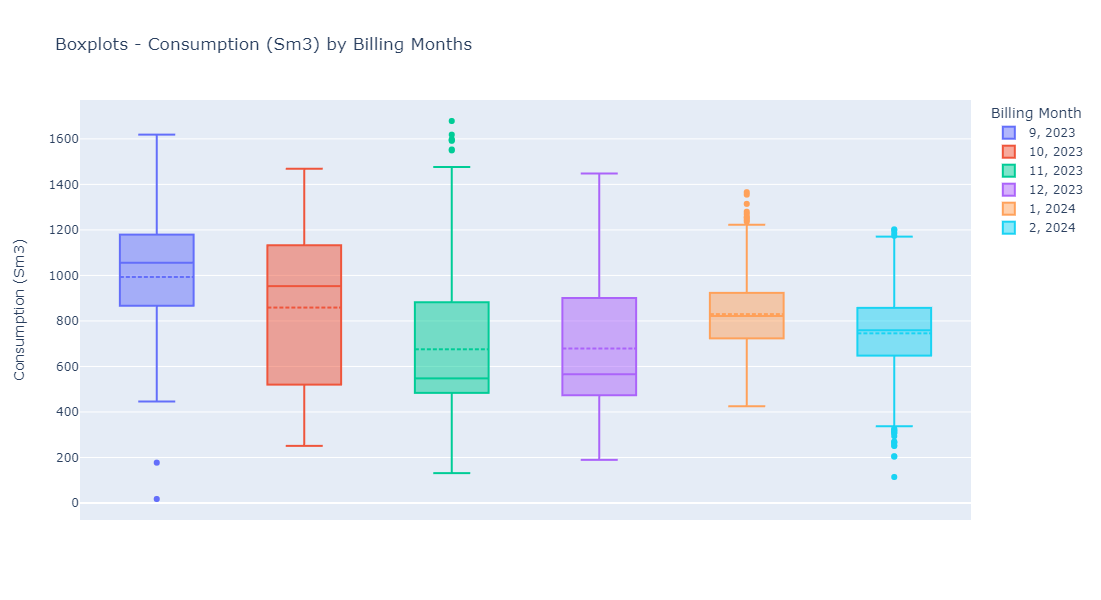

In [23]:
#Boxplots Sm3 - with outliers

fig = px.box(time_series_no_null, y = "Consumption (Sm3)", color = "Billing Month",
            title = "Boxplots - Consumption (Sm3) by Billing Months",
            width = 1000, height = 600)

fig.update_layout(boxmode='group',# 'group' or 'overlay'
                  boxgroupgap = 0.5, # Adjust the gap between the boxes 
                  boxgap=0)  # Adjust the gap as needed

fig.update_traces(boxmean=True) # To display mean

fig.show()

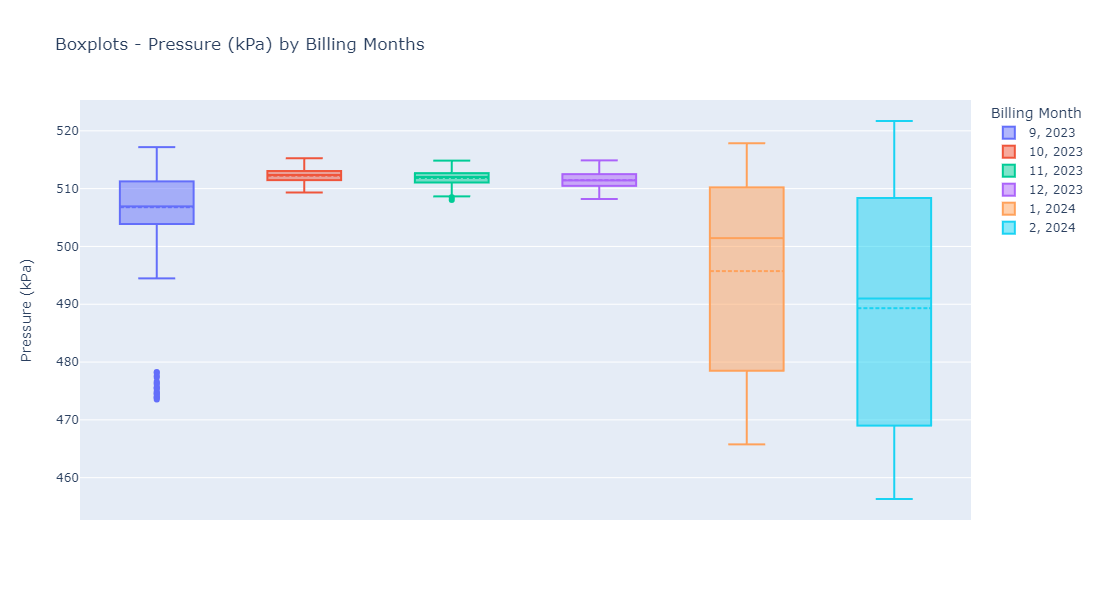

In [24]:
#Boxplots kPa - with outliers

fig = px.box(time_series_no_null, y = "Pressure (kPa)", color = "Billing Month",
            title = "Boxplots - Pressure (kPa) by Billing Months",
            width = 1000, height = 600)

fig.update_layout(boxmode='group',# 'group' or 'overlay'
                  boxgroupgap = 0.5, # Adjust the gap between the boxes 
                  boxgap=0)  # Adjust the gap as needed

fig.update_traces(boxmean=True) # To display mean

fig.show()

##### Winsorized with Q1, Q3 quartiles

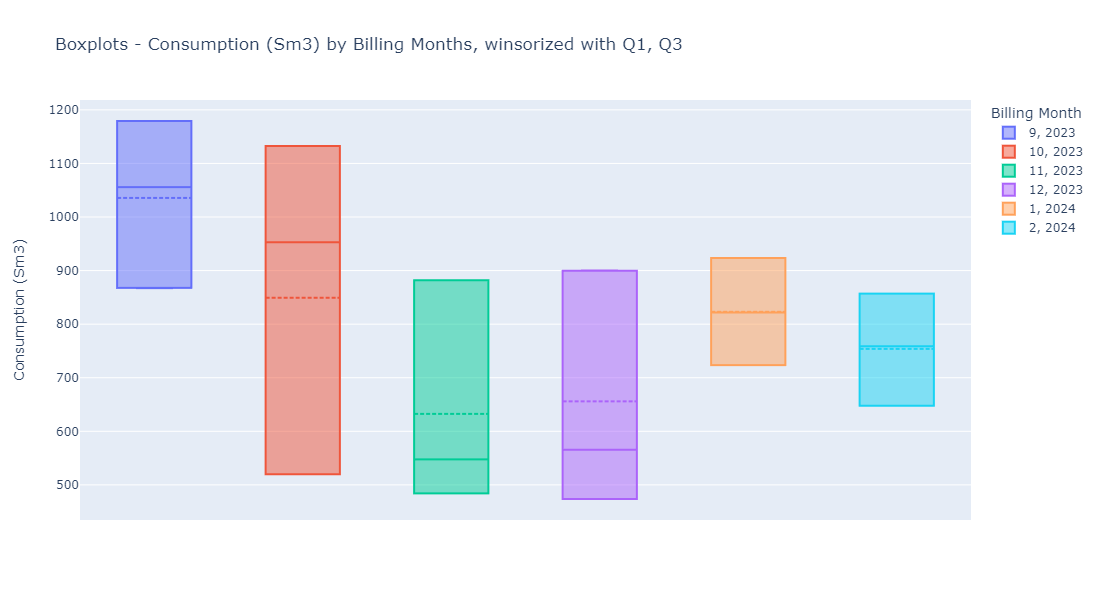

In [25]:
#Boxplots - winsorized with Q1, Q3 quartiles

fig = px.box(merged_time_series_1, y = "Consumption (Sm3)", color = "Billing Month",
            title = "Boxplots - Consumption (Sm3) by Billing Months, winsorized with Q1, Q3",
            width = 1000, height = 600)

fig.update_layout(boxmode='group',# 'group' or 'overlay'
                  boxgroupgap = 0.5, # Adjust the gap between the boxes 
                  boxgap=0)  # Adjust the gap as needed

fig.update_traces(boxmean=True) # To display mean

fig.show()

##### Winsorized with 5%, 95% percentiles

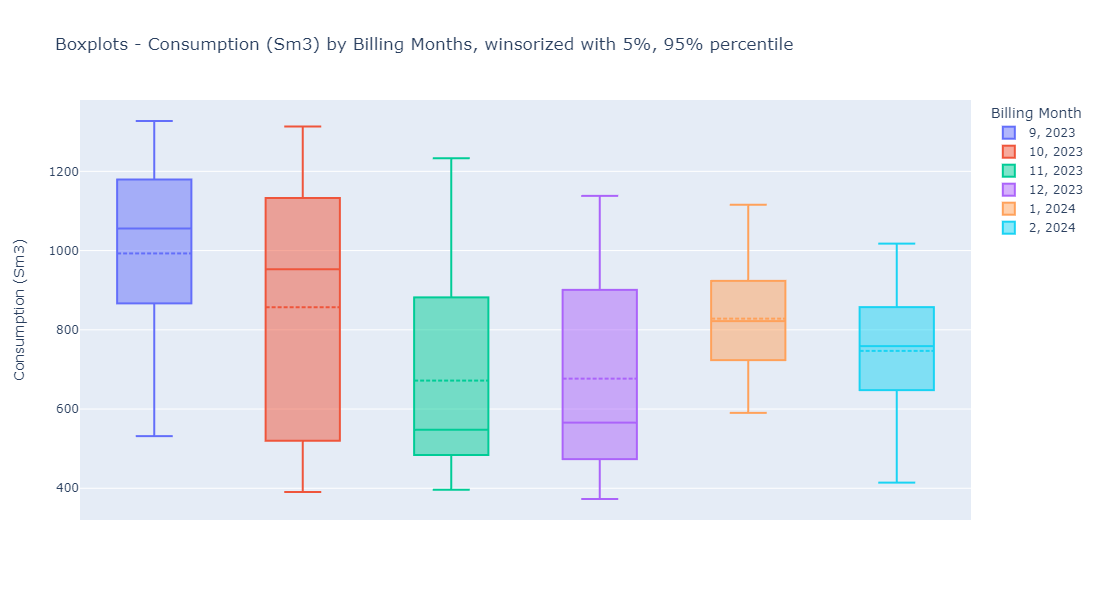

In [26]:
#Boxplots - winsorized with 5%, 95% percentiles

fig = px.box(merged_time_series_2, y = "Consumption (Sm3)", color = "Billing Month",
            title = "Boxplots - Consumption (Sm3) by Billing Months, winsorized with 5%, 95% percentile",
            width = 1000, height = 600)

fig.update_layout(boxmode='group',# 'group' or 'overlay'
                  boxgroupgap = 0.5, # Adjust the gap between the boxes 
                  boxgap=0)  # Adjust the gap as needed

fig.update_traces(boxmean=True) # To display mean

fig.show()

#### Line Charts

##### Over Time

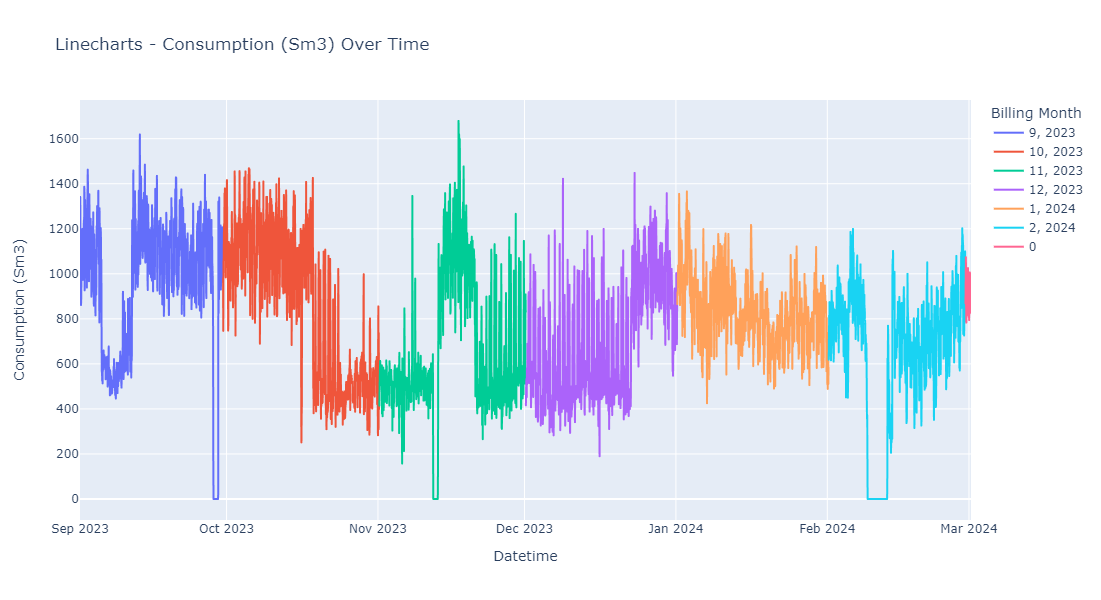

In [27]:
#Line charts consumption over time

fig = px.line(time_series, x= "Datetime", y = "Consumption (Sm3)", color = "Billing Month",
            title = "Linecharts - Consumption (Sm3) Over Time",
            height = 600)

fig.show()

##### Moving Averages

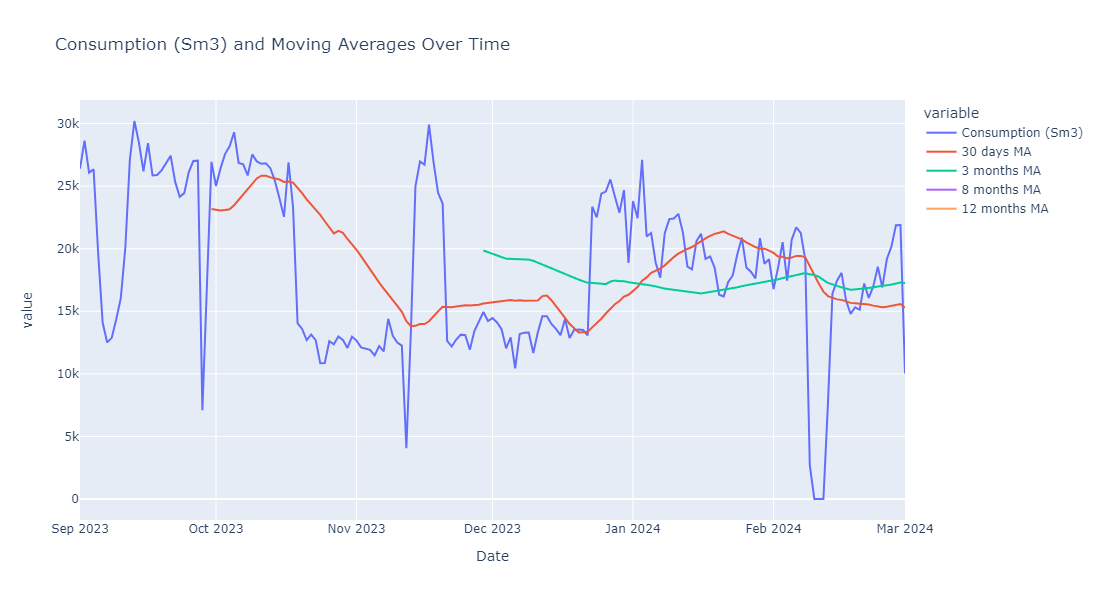

In [28]:
# Moving Averages over time

time_series_daily = time_series.groupby(['Date'], sort = False).sum()

time_series_daily = time_series_daily.iloc[:,[0]]

time_series_daily.reset_index(inplace = True)

# moving average 30 days
time_series_daily['30 days MA'] = time_series_daily['Consumption (Sm3)'].rolling(30).mean()

# moving average 90 days - 3 months
time_series_daily['3 months MA'] = time_series_daily['Consumption (Sm3)'].rolling(90).mean()

# moving average 240 days - 8 months
time_series_daily['8 months MA'] = time_series_daily['Consumption (Sm3)'].rolling(240).mean()

# moving average 360 days - 1 year
time_series_daily['12 months MA'] = time_series_daily['Consumption (Sm3)'].rolling(360).mean()

fig = px.line(time_series_daily, x='Date', y=['Consumption (Sm3)', '30 days MA', '3 months MA', '8 months MA', '12 months MA'],
              height = 600,
              title='Consumption (Sm3) and Moving Averages Over Time')
           
fig.show()

##### Trend for each Calendar Months

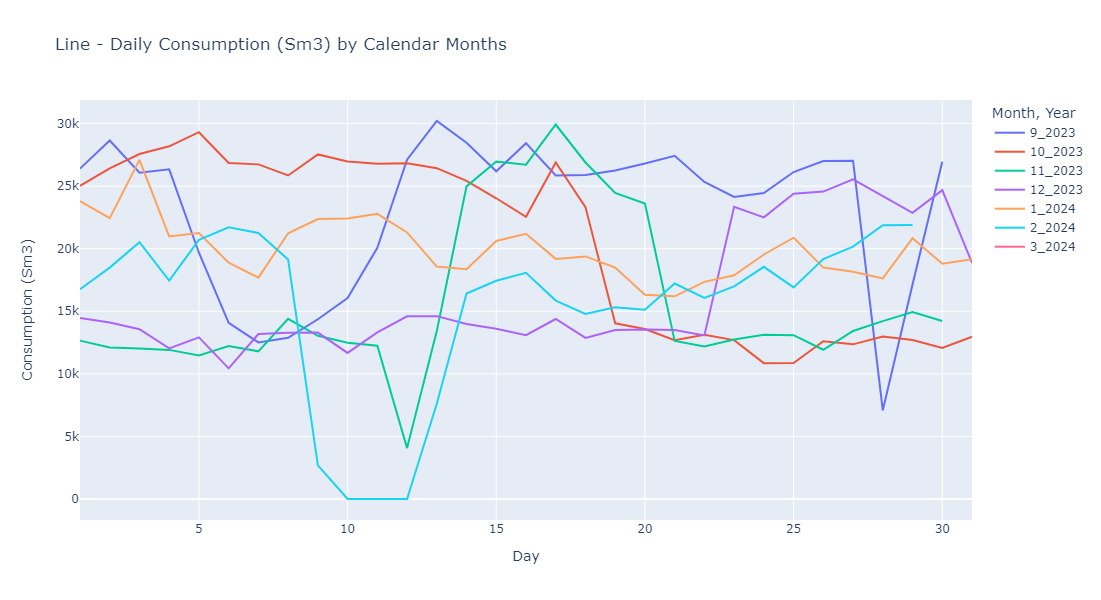

In [29]:
# Daily consumption by for in each calendar months

time_series_day = time_series.groupby(['Day', 'Month', 'Year'], sort = False).sum()
time_series_day = time_series_day["Consumption (Sm3)"]
time_series_day = time_series_day.to_frame()

time_series_day.reset_index(inplace = True)

time_series_day.sort_values(['Year', 'Month', 'Day'], ascending = True, inplace = True)

# combine Month and Year to create a unique column

time_series_day['Month, Year'] = time_series_day['Month'].astype(str)+ '_' + time_series_day['Year'].astype(str)

fig = px.line(time_series_day, x= "Day", y = "Consumption (Sm3)", color = 'Month, Year',
            height = 600,
            title = "Line - Daily Consumption (Sm3) by Calendar Months")

fig.show()

#### Column Charts

In [30]:
time_series.columns

Index(['Date', 'Time', 'Datetime', 'Consumption (Sm3)', 'Consumption (m3)',
       'Pressure (kPa)', 'Billing Month', 'Year', 'Month', 'Day',
       'DayOfTheWeek', 'WeekOfTheYear'],
      dtype='object')

##### Sum of Consumption, Day of the Week

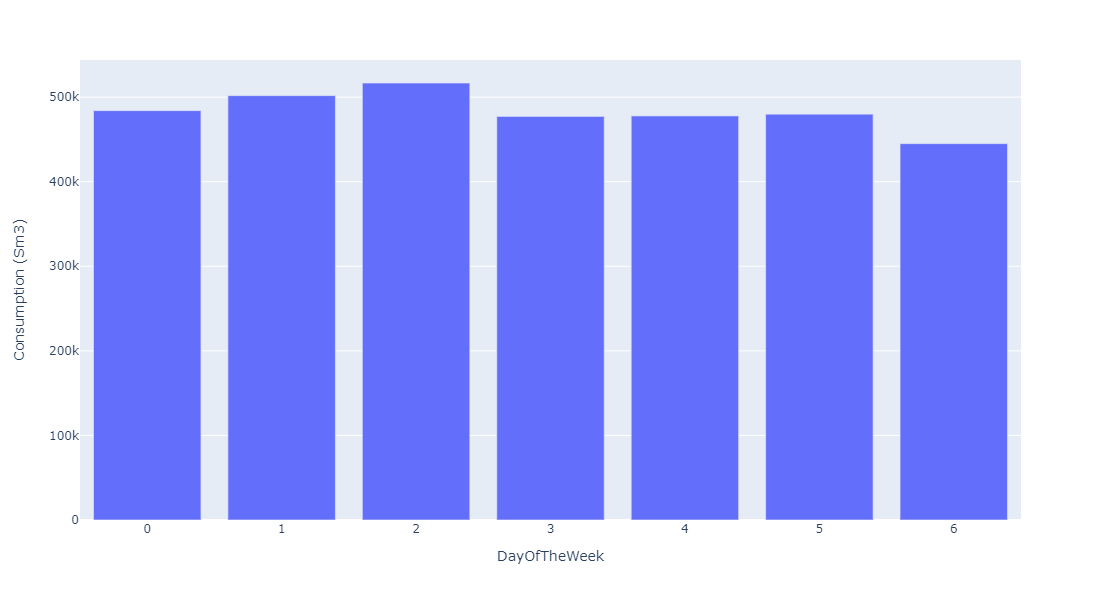

In [31]:
# Sum of Consumption by each day of the week

time_series_all = time_series.groupby(['DayOfTheWeek'], sort = False).sum()
time_series_all = time_series_all["Consumption (Sm3)"]
time_series_all  = time_series_all.to_frame()

time_series_all.reset_index(inplace = True)


fig = px.bar(time_series_all, x= "DayOfTheWeek", y = "Consumption (Sm3)", 
            height = 600)

fig.show()

##### Daily Averages, Day of the Week

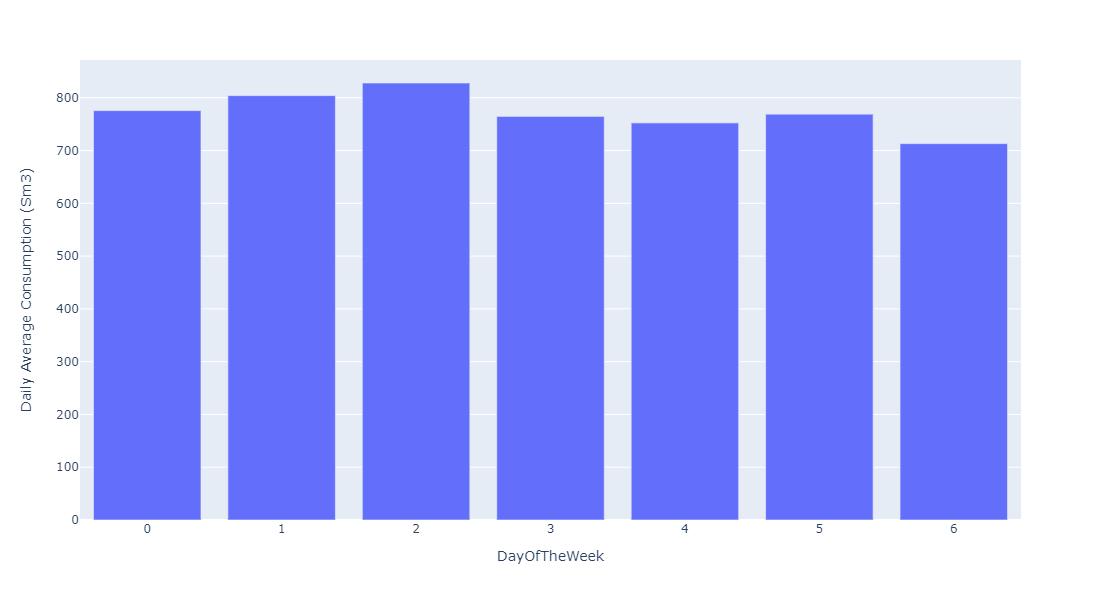

In [32]:
# Daily Average Consumption by each day of the week

time_series_avg = time_series.groupby(['DayOfTheWeek'], sort = False).mean()
time_series_avg = time_series_avg["Consumption (Sm3)"]
time_series_avg  = time_series_avg.to_frame()

time_series_avg.reset_index(inplace = True)

time_series_avg["Daily Average Consumption (Sm3)"] = time_series_avg["Consumption (Sm3)"]


fig = px.bar(time_series_avg, x= "DayOfTheWeek", y = "Daily Average Consumption (Sm3)", 
            height = 600)


fig.show()

##### Daily Averages, Day of the Week by each Billing Months

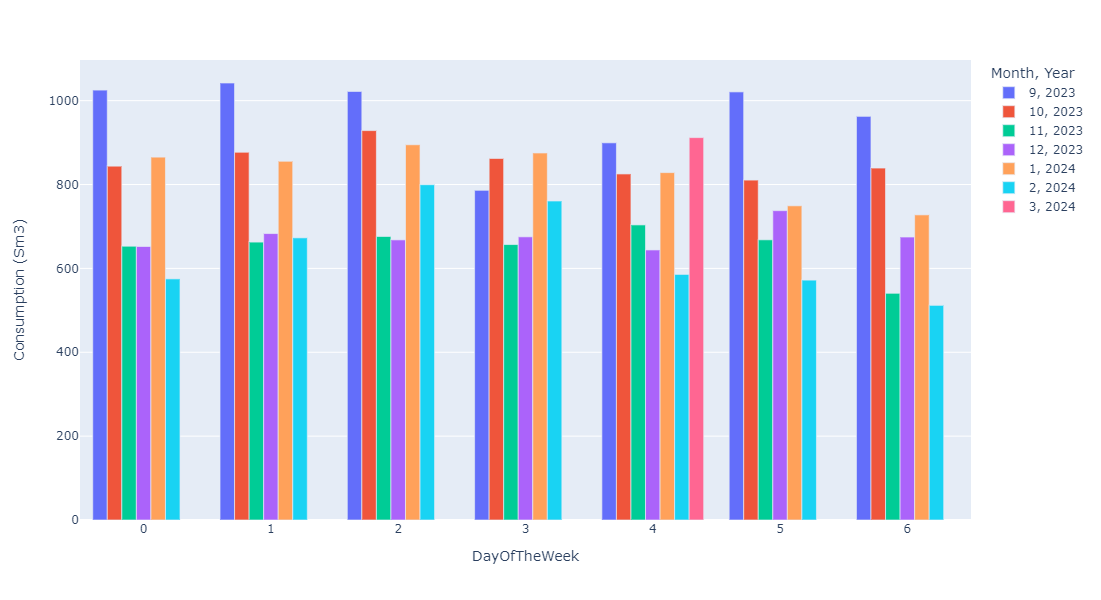

In [33]:
time_series_dow = time_series.groupby(['Year', 'Month', 'DayOfTheWeek'], sort = False).mean()
time_series_dow = time_series_dow["Consumption (Sm3)"]
time_series_dow  = time_series_dow.to_frame()

time_series_dow.reset_index(inplace = True)

time_series_dow.sort_values(['Year', 'Month', 'DayOfTheWeek'], ascending = True, inplace = True)

time_series_dow["Month, Year"] = time_series_dow["Month"].astype(str) + ', ' + time_series_dow["Year"].astype(str)

# combine Month and Year to create a unique column


fig = px.bar(time_series_dow, x= "DayOfTheWeek", y = "Consumption (Sm3)", color = "Month, Year",
             barmode = "group",
            height = 600)


fig.show()

#### Histogram

##### With null

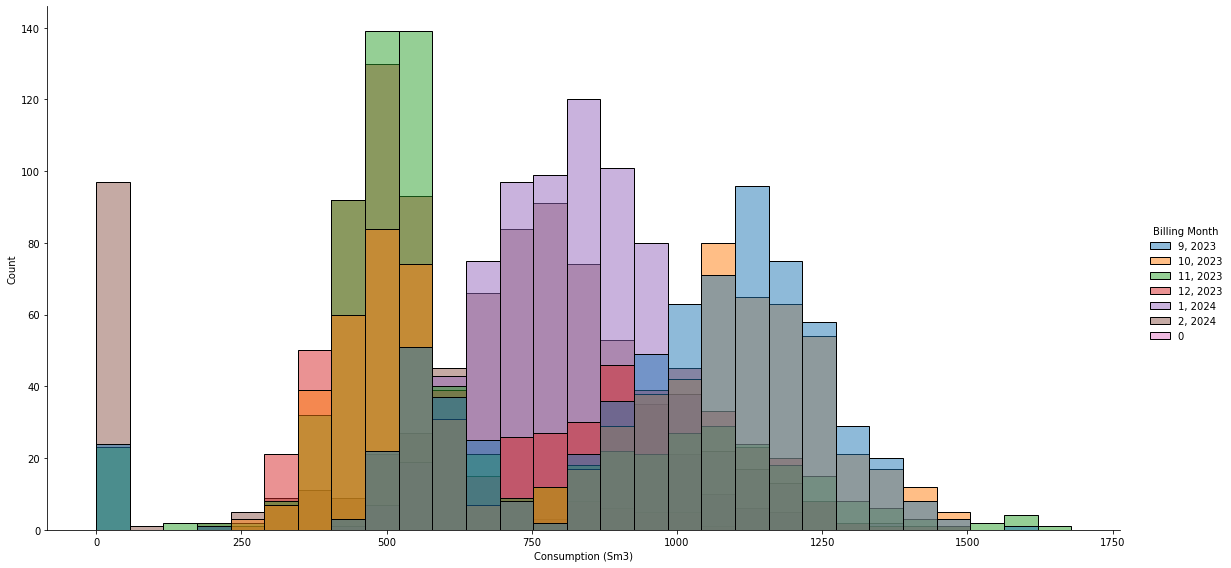

In [34]:
#Histogram with no null - stacked (Sm3)
hist_plot_stacked = sns.displot(data = time_series,
                              x = "Consumption (Sm3)",
                              hue = "Billing Month",
                              multiple = "layer",
                              height = 8,
                              aspect = 2)

hist_plot_stacked.set_axis_labels("Consumption (Sm3)", "Count")
hist_plot_stacked.set_titles("Distribution - Histogram Stack")



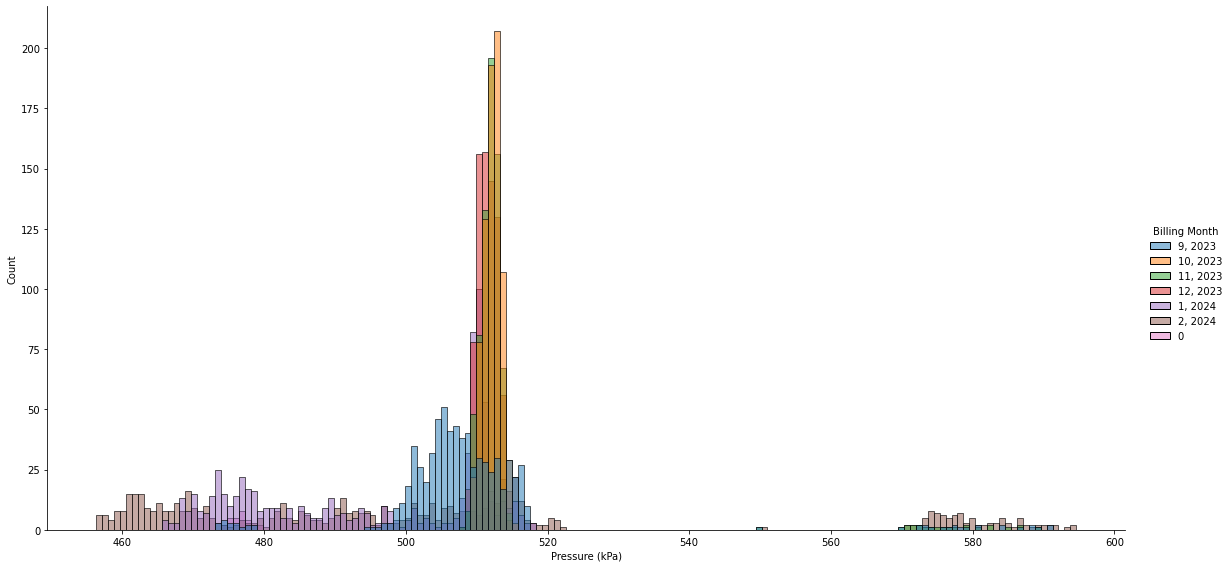

In [35]:
#Histogram with no null - stacked (kPa)
hist_plot_stacked = sns.displot(data = time_series,
                              x = "Pressure (kPa)",
                              hue = "Billing Month",
                              multiple = "layer",
                              height = 8,
                              aspect = 2)

hist_plot_stacked.set_axis_labels("Pressure (kPa)", "Count")
hist_plot_stacked.set_titles("Distribution - Histogram Stack")



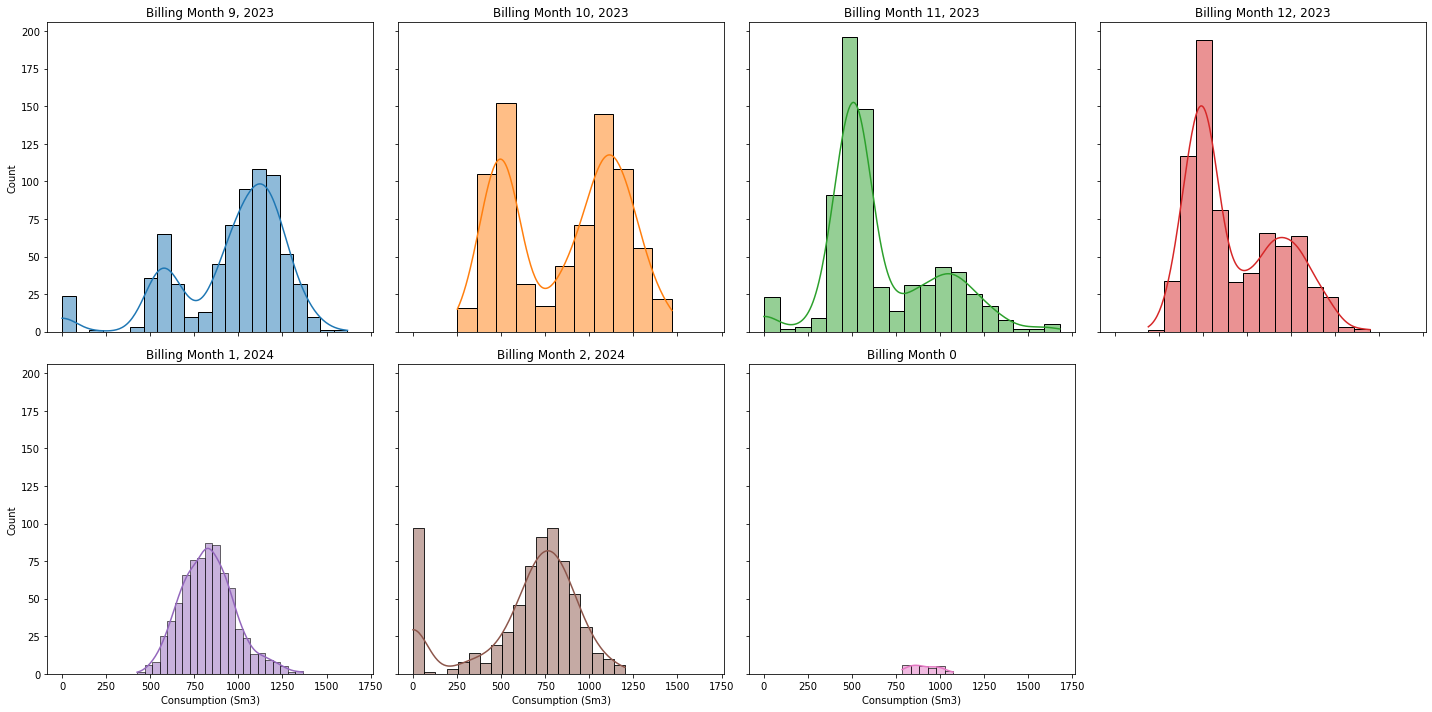

In [36]:
# Histogram multiples - Sm3
# Determine number of rows/columns needed from the unique values from Billing Month
num_billing_months = time_series["Billing Month"].nunique()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_billing_months // 4 + 1, 4, figsize=(20, 10), sharey=True, sharex=True)

# Get unique billing months in the order of appearance
billing_months_order = time_series["Billing Month"].unique()

# Loop over unique billing months, it prints over a tuple of index and its element pairs (index, billing months)
for i, billing_month in enumerate(time_series["Billing Month"].unique()):
    
    # Extract data for the current billing month
    data_for_month = time_series[time_series["Billing Month"] == billing_month]
    
    # Plot histogram for the current billing month with different hues
    row_index = i // 4
    col_index = i % 4
    sns.histplot(ax=axes[row_index, col_index], data=data_for_month, x="Consumption (Sm3)", hue="Billing Month", kde = True, common_bins = True, hue_order = billing_months_order, legend = False)
    axes[row_index, col_index].set_title(f"Billing Month {billing_month}")
    
# Hide empty subplots
for i in range(num_billing_months, len(axes.flatten())):
    axes.flatten()[i].axis("off")

plt.tight_layout()
plt.show()


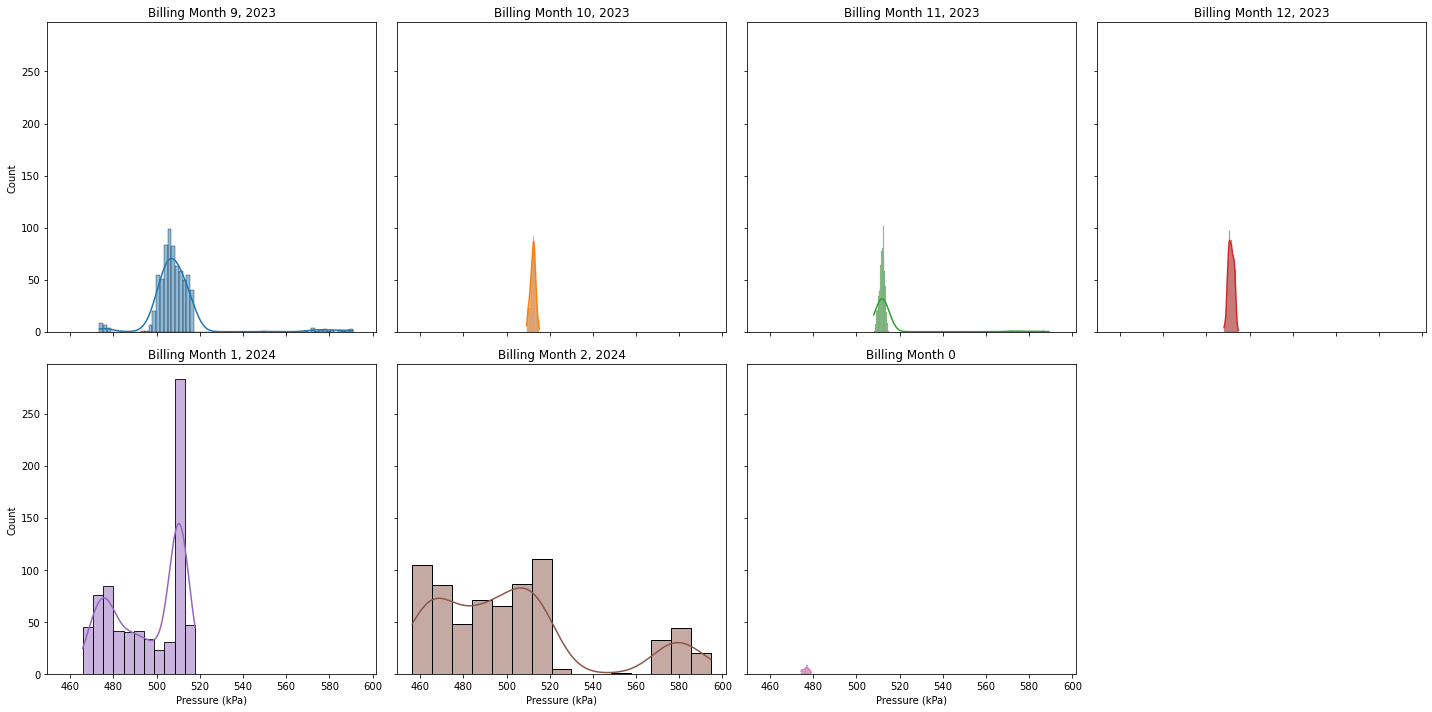

In [37]:
# Histogram multiples - kPa
# Determine number of rows/columns needed from the unique values from Billing Month
num_billing_months = time_series["Billing Month"].nunique()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_billing_months // 4 + 1, 4, figsize=(20, 10), sharey=True, sharex=True)

# Get unique billing months in the order of appearance
billing_months_order = time_series["Billing Month"].unique()

# Loop over unique billing months, it prints over a tuple of index and its element pairs (index, billing months)
for i, billing_month in enumerate(time_series["Billing Month"].unique()):
    
    # Extract data for the current billing month
    data_for_month = time_series[time_series["Billing Month"] == billing_month]
    
    # Plot histogram for the current billing month with different hues
    row_index = i // 4
    col_index = i % 4
    sns.histplot(ax=axes[row_index, col_index], data=data_for_month, x="Pressure (kPa)", hue="Billing Month", kde = True, common_bins = True, hue_order = billing_months_order, legend = False)
    axes[row_index, col_index].set_title(f"Billing Month {billing_month}")
    
# Hide empty subplots
for i in range(num_billing_months, len(axes.flatten())):
    axes.flatten()[i].axis("off")

plt.tight_layout()
plt.show()


##### Winsorized with Q1, Q3 quartiles

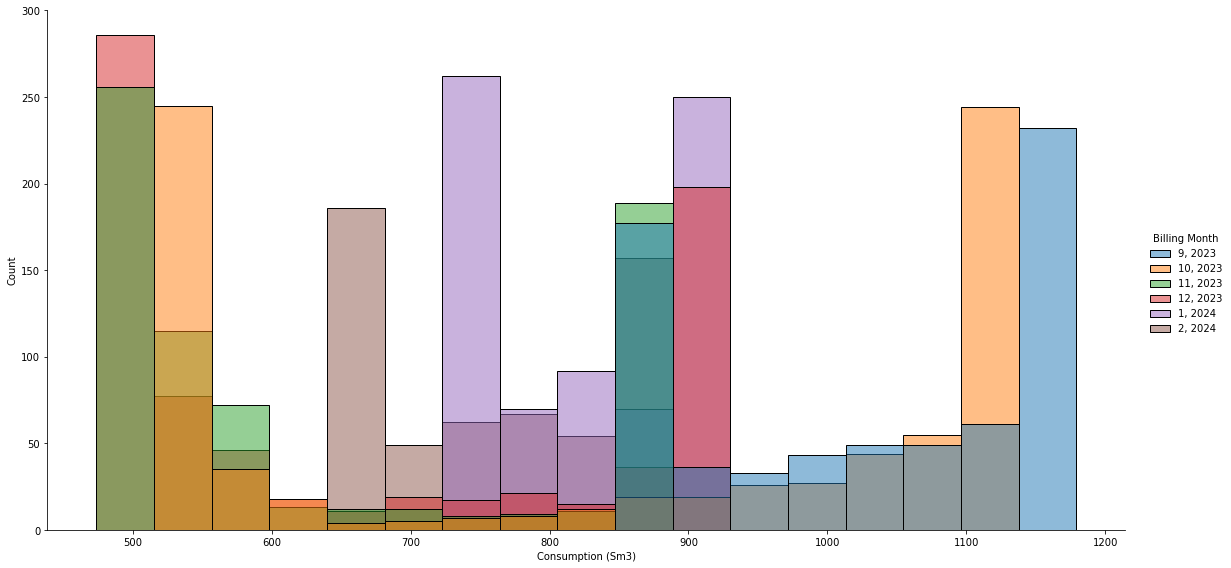

In [38]:
#Histogram winsorized quartiles - stacked
hist_plot_stacked = sns.displot(data = merged_time_series_1,
                              x = "Consumption (Sm3)",
                              hue = "Billing Month",
                              multiple = "layer",
                              height = 8,
                              aspect = 2)

hist_plot_stacked.set_axis_labels("Consumption (Sm3)", "Count")
hist_plot_stacked.set_titles("Distribution - Histogram Stack")



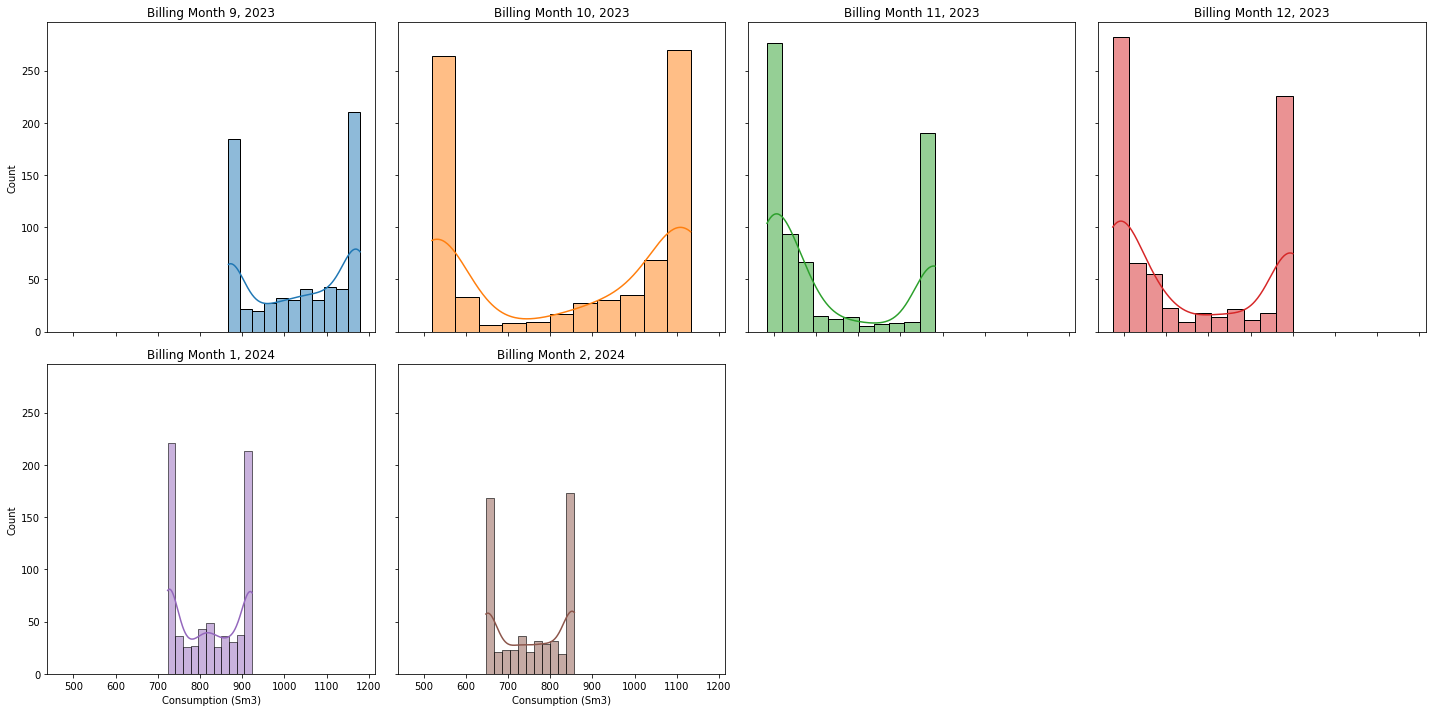

In [39]:
# Determine number of rows/columns needed from the unique values from Billing Month
num_billing_months = merged_time_series_1["Billing Month"].nunique()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_billing_months // 4 + 1, 4, figsize=(20, 10), sharey=True, sharex=True)

# Get unique billing months in the order of appearance
billing_months_order = merged_time_series_1["Billing Month"].unique()

# Loop over unique billing months, it prints over a tuple of index and its element pairs (index, billing months)
for i, billing_month in enumerate(merged_time_series_1["Billing Month"].unique()):
    
    # Extract data for the current billing month
    data_for_month = merged_time_series_1[merged_time_series_1["Billing Month"] == billing_month]
    
    # Plot histogram for the current billing month with different hues
    row_index = i // 4
    col_index = i % 4
    sns.histplot(ax=axes[row_index, col_index], data=data_for_month, x="Consumption (Sm3)", hue="Billing Month", kde = True, common_bins = True, hue_order = billing_months_order, legend = False)
    axes[row_index, col_index].set_title(f"Billing Month {billing_month}")

# Hide empty subplots
for i in range(num_billing_months, len(axes.flatten())):
    axes.flatten()[i].axis("off")

plt.tight_layout()
plt.show()


##### Winsorized with 5%, 95% percentiles

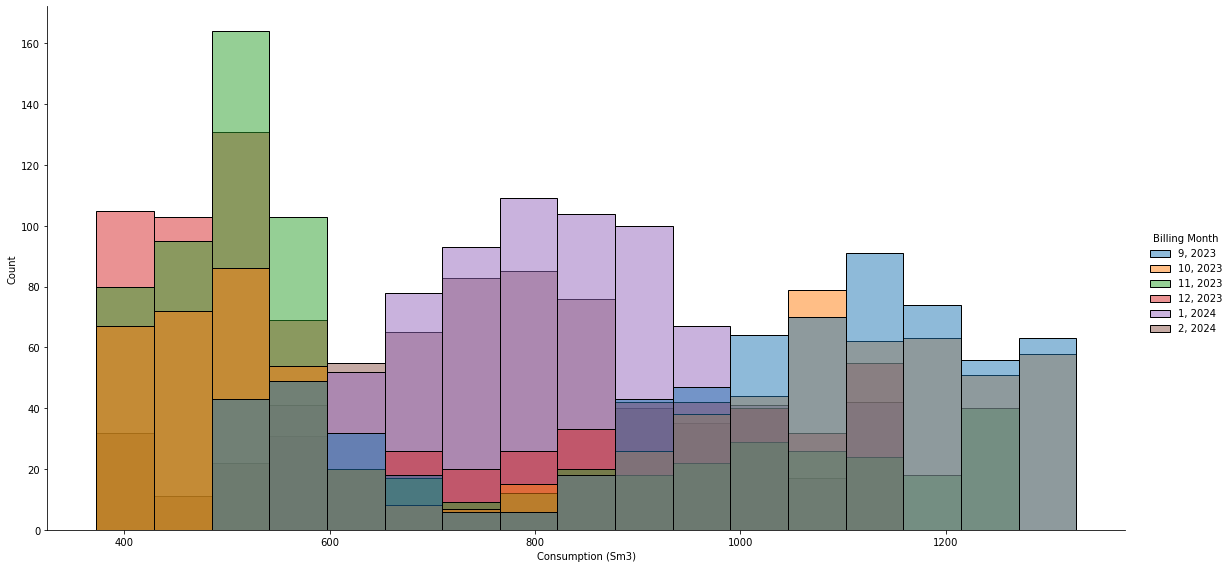

In [40]:
#Histogram winsorized percentiles - stacked
hist_plot_stacked = sns.displot(data = merged_time_series_2,
                              x = "Consumption (Sm3)",
                              hue = "Billing Month",
                              multiple = "layer",
                              height = 8,
                              aspect = 2)

hist_plot_stacked.set_axis_labels("Consumption (Sm3)", "Count")
hist_plot_stacked.set_titles("Distribution - Histogram Stack")



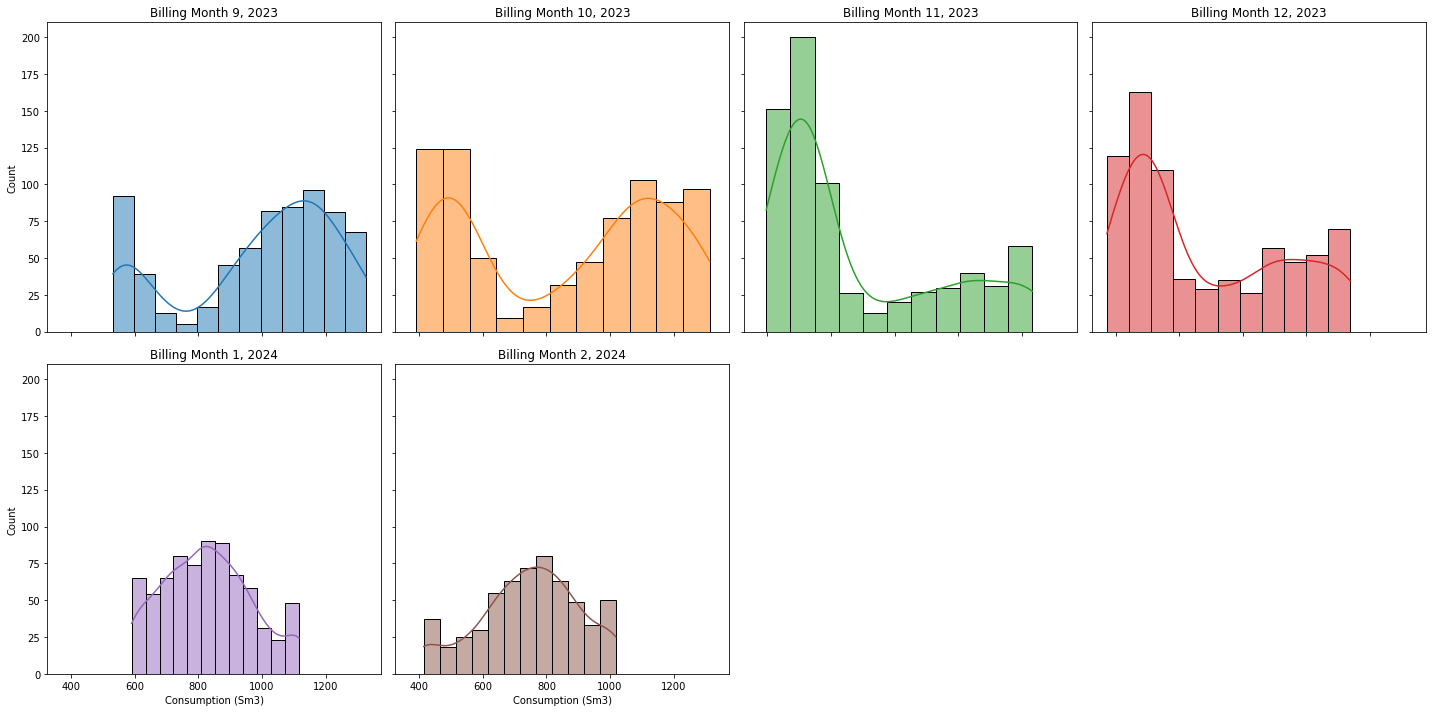

In [41]:
# Determine number of rows/columns needed from the unique values from Billing Month
num_billing_months = merged_time_series_2["Billing Month"].nunique()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_billing_months // 4 + 1, 4, figsize=(20, 10), sharey=True, sharex=True)

# Get unique billing months in the order of appearance
billing_months_order = merged_time_series_2["Billing Month"].unique()

# Loop over unique billing months, it prints over a tuple of index and its element pairs (index, billing months)
for i, billing_month in enumerate(merged_time_series_2["Billing Month"].unique()):
    
    # Extract data for the current billing month
    data_for_month = merged_time_series_2[merged_time_series_2["Billing Month"] == billing_month]
    
    # Plot histogram for the current billing month with different hues
    row_index = i // 4
    col_index = i % 4
    sns.histplot(ax=axes[row_index, col_index], data=data_for_month, x="Consumption (Sm3)", hue="Billing Month", kde = True, common_bins = True, hue_order = billing_months_order, legend = False)
    axes[row_index, col_index].set_title(f"Billing Month {billing_month}")

    
# Hide empty subplots
for i in range(num_billing_months, len(axes.flatten())):
    axes.flatten()[i].axis("off")

plt.tight_layout()
plt.show()


### Two tailed t-test

In [43]:
# Filter raw_mrd to only include rows where "Main Meter" is "yes"
raw_mrd_filtered = raw_mrd[raw_mrd["Main Meter"] == "Yes"]

# Significance levels for various confidence intervals
alpha_values = {
    0.999: 0.001,
    0.99: 0.01,
    0.95: 0.05,
    0.90: 0.10
}

# Iterate through unique "Billing Month" values
for month in set(time_series_no_null["Billing Month"]).intersection(set(raw_mrd_filtered["Billing Month"])):
    # Step 1: Calculate sample mean x_bar
    x_bar = time_series_no_null.groupby("Billing Month").get_group(month)["Consumption (Sm3)"].mean()

    # Step 2: Calculate mu
    total_consumption = raw_mrd_filtered.loc[raw_mrd_filtered["Billing Month"] == month, "Total Consumption"].iloc[0]
    num_rows = len(time_series_no_null[time_series_no_null["Billing Month"] == month])
    mu = total_consumption/num_rows

    # Step 3: Perform two-tailed t-test
    N1 = len(time_series_no_null.groupby("Billing Month").get_group(month))
    dof = N1 - 1
    t_stat, p_val = stats.ttest_1samp(a=time_series_no_null.groupby("Billing Month").get_group(month)["Consumption (Sm3)"], popmean=mu)
    p_val *= 2  # Multiply p-value by 2 for two-tailed test
    
    # Print the results for the current Billing Month
    print(f"For Billing Month {month}:")
    print("Hourly Mean Consumption =", x_bar)
    print("Est. Hourly Mean Turbine =", mu)
    print("t-statistic =", t_stat)
    print("p-value =", p_val)
    
    # Check for each confidence level
    for confidence_level, alpha in alpha_values.items():
        # Calculate t-critical value
        t_crit = stats.t.ppf(1 - alpha/2, dof)
    
    # Check for each confidence level
    for confidence_level, alpha in alpha_values.items():
        # Calculate t-critical value
        t_crit = stats.t.ppf(1 - alpha/2, dof)
        
        # Check if absolute value of t-statistic is greater than t-critical value
        if abs(t_stat) > t_crit:
            print("Reject null hypothesis at {}% confidence level (alpha = {}) or (t-statistic > t-critical {})".format(confidence_level * 100, alpha, '%.5f'%t_crit))
        else:
            print("Fail to reject null hypothesis at {}% confidence level (alpha = {}) or (t-statistic <= t-critical {})".format(confidence_level * 100, alpha, '%.5f'%t_crit))

    
    print()

For Billing Month 1, 2024:
Hourly Mean Consumption = 830.0831798387106
Est. Hourly Mean Turbine = 830.0833333333334
t-statistic = -2.7271894246467674e-05
p-value = 1.9999564949940305
Fail to reject null hypothesis at 99.9% confidence level (alpha = 0.001) or (t-statistic <= t-critical 3.30367)
Fail to reject null hypothesis at 99.0% confidence level (alpha = 0.01) or (t-statistic <= t-critical 2.58246)
Fail to reject null hypothesis at 95.0% confidence level (alpha = 0.05) or (t-statistic <= t-critical 1.96316)
Fail to reject null hypothesis at 90.0% confidence level (alpha = 0.1) or (t-statistic <= t-critical 1.64691)

For Billing Month 10, 2023:
Hourly Mean Consumption = 858.7233772135414
Est. Hourly Mean Turbine = 858.7239583333334
t-statistic = -4.928875757885061e-05
p-value = 1.999921372155187
Fail to reject null hypothesis at 99.9% confidence level (alpha = 0.001) or (t-statistic <= t-critical 3.30326)
Fail to reject null hypothesis at 99.0% confidence level (alpha = 0.01) or (t-